<a href="https://colab.research.google.com/github/EsauHervert/DRP-Machine-Learning/blob/master/Linear_Regression_f(x)_%3D_w0%2Bw1x%2Bw2x%5E2%2B_%2Bwnx%5En.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notice that to transform the equation $f(x) = w_0+w_1x$ to a system, we used the following:

$$\tilde{x} = \begin{bmatrix}
1\\
x
\end{bmatrix}$$

$$w = \begin{bmatrix}
w_0\\
w_1
\end{bmatrix}$$

To get the following:

$$f(\tilde{x}) = w^T\tilde{x}$$

Now let us do the same for the case $f(x) = w_0 + w_1x + w_2x^2 + \cdots + w_k x^k$. We will do the following:

$$\tilde{x} = \begin{bmatrix}
1\\
x\\
x^2\\
\vdots\\
x^k
\end{bmatrix}$$

$$w = \begin{bmatrix}
w_0\\
w_1\\
w_2\\
\vdots\\
w_k
\end{bmatrix}$$

To get the following:

$$f(\tilde{x}) = w^T\tilde{x}$$

Given the training data ${X,Y}$ representing a polynomial $f(x) = w_0 + w_1x + w_2x^2 + \cdots + w_k x^k$we use the following loss function:

$$\mathcal{L}(X,Y,w) = \frac{1}{2n}\sum_{i=1}^n(w^T\tilde{x}_i - y_i)^2$$

From here we get that:

$$\nabla_w\mathcal{L}(X,Y,w) = \frac{1}{n}\sum_{i=1}^n(w^T\tilde{x}_i - y_i)*\tilde{x}_i := \delta(w)$$

Thus the update rule becomes:

$$w_{j+1} = w_j - \eta\delta(w_j)$$


Now let us look at the function

$$f(x) = 3 - x +3x^2 + 4x^3$$

in the interval $[-1,1]$.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Let us create out $X$ and our $f(X)$.

In [0]:
X = torch.arange(-1,1,0.01)
n = X.numpy().size
X = torch.reshape(X, (1, n))
Y = 3 - X + 3*X*X + 4*X*X*X
print(Y.size())

torch.Size([1, 200])


Now let us create our $\tilde{X}$.

In [0]:
X0 = torch.ones(1,n)
X1 = X
X2 = X*X
X3 = X*X*X
Xt = torch.cat((X0, X1, X2, X3), 0)
print(Xt.size())

torch.Size([4, 200])


We can use the exact gradient descent algorithm that we used in the previous case.

In [0]:
def GradDescent(X, Y, w, eta, N):
  n,m = X.size()
  for j in range(N):
    wT = torch.transpose(w, 0, 1)
    E = torch.mm(wT, X) - Y
    delta = (E*X).mean(1)
    delta = torch.reshape(delta, (n, 1))
    w -= eta*delta
  return w

In [0]:
def sGradDescent(X, Y, w, eta, N, s):
  n,m = X.size()
  for j in range(N):
    perm = torch.randperm(n)
    perm = perm[0:s]
    wT = torch.transpose(w, 0, 1)
    Xpi = X[perm]
    Ypi = Y[perm]
    Epi = torch.mm(wT, Xpi) - Ypi
    delta = (Epi*)

Now let us initalize a random weight vector.

In [0]:
w = torch.rand(4,1)
w_new = w.clone()
print(w)

tensor([[0.9965],
        [0.4804],
        [0.0389],
        [0.8712]])


Now us define a function that will give us an output depending on $w$ and plot this function and the training data.

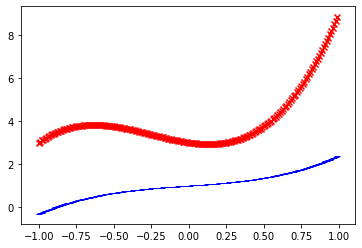

In [0]:
def f(w,x):
  wT = torch.transpose(w, 0, 1)
  return torch.mm(wT, x)

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(w, Xt), marker = '_', color = 'blue')
ax1.scatter(X, Y, marker='x', color='red')

Now let us run our gradient descent to see what kind of value we get.

In [0]:
w_new = GradDescent(Xt, Y, w_new, .01, 1000)
print(w_new)

tensor([[ 3.0064],
        [-0.4192],
        [ 2.9766],
        [ 3.0797]])


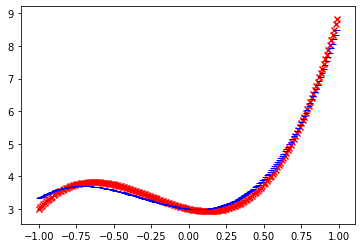

In [0]:
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(w_new, Xt), marker = '_', color = 'blue')
ax1.scatter(X, Y, marker='x', color='red')

tensor([[ 3.0017],
        [-0.7463],
        [ 2.9929],
        [ 3.5981]])


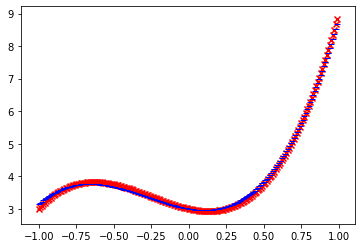

In [0]:
w_new = GradDescent(Xt, Y, w_new, .01, 5000)
print(w_new)

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(w_new, Xt), marker = '_', color = 'blue')
ax1.scatter(X, Y, marker='x', color='red')